In [1]:
import pandas as pd
import numpy as np
import seaborn as sb

#### Load capped dataset

In [2]:
# Let's load dataset which is created in previous handling outliers step
df = pd.read_csv("capped_World_development_mesurement.csv")
df.tail(4)

,Unnamed: 0,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
2700,2700,0.013,464.0,NaN,United States,5.000,4.0,2132446.0,1.624460e+13,0.179,...,76.0,1.0,1,0.196,0.667,0.1355,313873685.0,0.811,2.000920e+11,1.265730e+11
2701,2701,0.015,419.0,NaN,Uruguay,40.625,85.0,NaN,5.000435e+10,0.089,...,74.0,1.5,1,0.220,0.639,0.1400,3395253.0,0.948,2.222000e+09,7.075000e+08
2702,2702,0.020,619.0,NaN,"Venezuela, RB",141.000,180.0,NaN,3.812862e+11,0.048,...,72.0,1.0,1,0.288,0.652,0.0600,29954782.0,0.889,9.040000e+08,3.202000e+09
2703,2703,0.011,NaN,NaN,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,...,76.0,NaN,1,0.206,0.641,0.1520,105275.0,0.949,NaN,NaN


In [3]:
print(f'shape of data ::: {df.shape} \n')
df.info()

shape of data ::: (2704, 26) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              2704 non-null   int64  
 1   Birth Rate              2585 non-null   float64
 2   Business Tax Rate       1423 non-null   float64
 3   CO2 Emissions           2125 non-null   float64
 4   Country                 2704 non-null   object 
 5   Days to Start Business  1718 non-null   float64
 6   Ease of Business        185 non-null    float64
 7   Energy Usage            1785 non-null   float64
 8   GDP                     2494 non-null   float64
 9   Health Exp % GDP        2395 non-null   float64
 10  Health Exp/Capita       2395 non-null   float64
 11  Hours to do Tax         1416 non-null   float64
 12  Infant Mortality Rate   2444 non-null   float64
 13  Internet Usage          2531 non-null   float64
 14  Lending I

#### Compute the mean of important features, grouped by country

In [4]:
gdp_series = df.groupby('Country')['GDP'].mean()
tax_series = df.groupby('Country')['Business Tax Rate'].mean()
hgdp_series = df.groupby('Country')['Health Exp % GDP'].mean()
hcapita_series = df.groupby('Country')['Health Exp/Capita'].mean()
interest_series = df.groupby('Country')['Lending Interest'].mean()

df_country = pd.concat([gdp_series, tax_series, hgdp_series, hcapita_series, interest_series], axis=1)
df_country

,GDP,Business Tax Rate,Health Exp % GDP,Health Exp/Capita,Lending Interest
Country,,,,,
Afghanistan,9.718945e+09,363.000000,0.091909,30.636364,0.159714
Albania,8.895522e+09,425.500000,0.061462,168.846154,0.135923
Algeria,1.190391e+11,737.125000,0.038462,133.846154,0.080654
American Samoa,NaN,NaN,NaN,NaN,NaN
Andorra,2.268380e+09,NaN,0.061462,2394.461538,NaN
...,...,...,...,...,...
Vietnam,7.791354e+10,390.375000,0.060769,51.692308,0.116308
Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN
"Yemen, Rep.",2.065261e+10,461.671875,0.048308,49.000000,0.189577


#### get all countries where all important features are null

In [5]:
null_countries = df_country[df_country[['GDP','Business Tax Rate','Health Exp % GDP','Health Exp/Capita','Lending Interest']].isnull().all(axis=1)]
null_countries

,GDP,Business Tax Rate,Health Exp % GDP,Health Exp/Capita,Lending Interest
Country,,,,,
American Samoa,NaN,NaN,NaN,NaN,NaN
Cayman Islands,NaN,NaN,NaN,NaN,NaN
Curacao,NaN,NaN,NaN,NaN,NaN
Guam,NaN,NaN,NaN,NaN,NaN
"Korea, Dem. Rep.",NaN,NaN,NaN,NaN,NaN
Sint Maarten (Dutch part),NaN,NaN,NaN,NaN,NaN
Somalia,NaN,NaN,NaN,NaN,NaN
St. Martin (French part),NaN,NaN,NaN,NaN,NaN
Turks and Caicos Islands,NaN,NaN,NaN,NaN,NaN


#### drop all countries where all important features are null

In [6]:
for country in null_countries.index:   
    df.drop(df[(df['Country'] == country)].index, inplace=True)

In [7]:
#(df.isnull().mean().round(4) * 100)

#### Compute the mean & median of all features, grouped by country

In [8]:
features = df.select_dtypes(include=['number']).columns.tolist()

features_n = ['Ease of Business','Population 0-14','Population 15-64','Population Urban']
features_d = [x for x in features if x not in features_n]

ct_n = df.groupby('Country')[features_n].mean()
ct_d = df.groupby('Country')[features_d].median()
ct = pd.concat([ct_n, ct_d], axis=1)
ct.head()

,Ease of Business,Population 0-14,Population 15-64,Population Urban,Unnamed: 0,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Energy Usage,...,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 65+,Population Total,Tourism Inbound,Tourism Outbound
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,170.0,0.490308,0.488000,0.232923,1301.0,0.0440,363.0,1016.0,9.0,NaN,...,0.0,0.151,59.0,56.0,0.2,1.0,0.020,25631282.0,1.160000e+08,80000000.0
Albania,82.0,0.258385,0.653692,0.478538,1335.0,0.0140,414.5,4056.0,22.5,2060.0,...,0.1,0.130,80.0,73.0,0.6,1.0,0.089,2968028.0,1.057000e+09,989000000.0
Algeria,151.0,0.292692,0.663077,0.645154,1248.0,0.0220,729.0,103963.0,25.0,33496.5,...,0.1,0.080,72.0,68.0,0.6,1.0,0.045,34507214.0,3.000000e+08,504000000.0
Andorra,NaN,NaN,NaN,0.897462,1336.0,0.0105,NaN,535.0,NaN,NaN,...,0.6,NaN,NaN,NaN,0.8,1.0,NaN,78360.0,NaN,NaN
Angola,178.0,0.477538,0.498154,0.369846,1249.0,0.0490,521.0,19156.0,93.5,9841.0,...,0.0,0.225,50.0,48.0,0.2,1.0,0.024,17122409.0,1.030000e+08,270000000.0


#### fill null values with the mean or median of all features, grouped by country

In [9]:
for c in ct.index:
    for f in features:
        if f!= 'Number of Records':
            fill_val = ct.loc[c,f]            
            if not pd.isna(fill_val):
                df.loc[df['Country'] == c, f] = df.loc[df['Country'] == c, f].fillna(fill_val)            

#### fill all other null values with 0

In [10]:
df.fillna(0, inplace=True)

In [11]:
df

,Unnamed: 0,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0,0.020,729.000,87931.0,Algeria,25.000,151.0,26998.0,5.479006e+10,0.035,...,67.0,0.0,1,0.342,0.619,0.0390,31719449.0,0.599,1.020000e+08,1.930000e+08
1,1,0.050,521.000,9542.0,Angola,93.500,178.0,7499.0,9.129595e+09,0.034,...,44.0,0.0,1,0.476,0.499,0.0250,13924930.0,0.324,3.400000e+07,1.460000e+08
2,2,0.043,732.000,1617.0,Benin,31.000,175.0,1983.0,2.359122e+09,0.043,...,53.0,0.0,1,0.454,0.517,0.0290,6949366.0,0.383,7.700000e+07,5.000000e+07
3,3,0.027,171.000,4276.0,Botswana,92.000,65.0,1836.0,5.788312e+09,0.047,...,49.0,0.1,1,0.383,0.587,0.0290,1755375.0,0.532,2.270000e+08,2.090000e+08
4,4,0.046,448.500,1041.0,Burkina Faso,17.000,154.0,0.0,2.610959e+09,0.051,...,49.0,0.0,1,0.468,0.505,0.0275,11607944.0,0.178,2.300000e+07,3.000000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2697,2697,0.018,279.000,2380.0,Suriname,694.000,165.0,705.0,5.012121e+09,0.059,...,68.0,1.1,1,0.278,0.656,0.0660,534541.0,0.662,7.900000e+07,5.800000e+07
2698,2698,0.015,291.375,30993.0,Trinidad and Tobago,41.000,63.0,18221.5,2.343634e+10,0.054,...,66.0,1.4,1,0.207,0.705,0.0880,1337439.0,0.088,5.525000e+08,1.505000e+08
2700,2700,0.013,464.000,5681664.0,United States,5.000,4.0,2132446.0,1.624460e+13,0.179,...,76.0,1.0,1,0.196,0.667,0.1355,313873685.0,0.811,2.000920e+11,1.265730e+11
2701,2701,0.015,419.000,5776.0,Uruguay,40.625,85.0,3132.0,5.000435e+10,0.089,...,74.0,1.5,1,0.220,0.639,0.1400,3395253.0,0.948,2.222000e+09,7.075000e+08


#### changes after capping and imputing can be clearly seen in histograms and heatmap

In [12]:
import matplotlib.pyplot as plt

In [13]:
features = df.columns

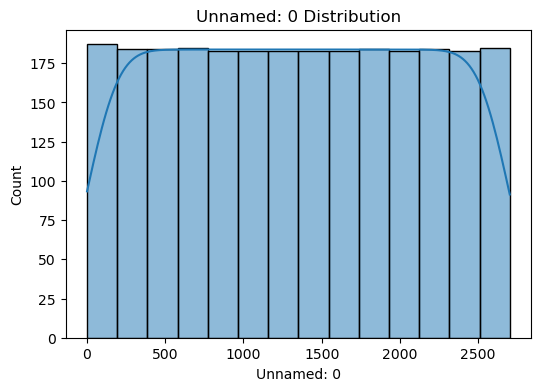

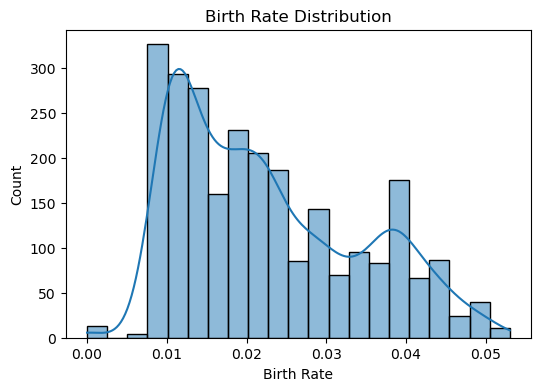

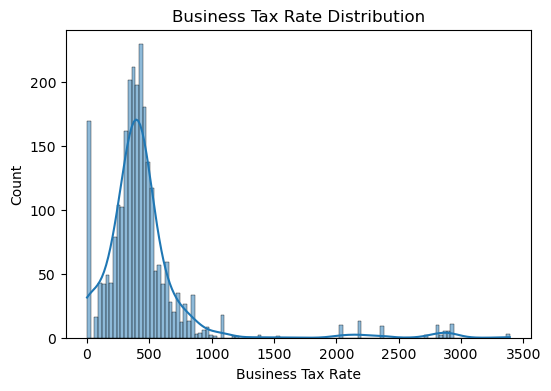

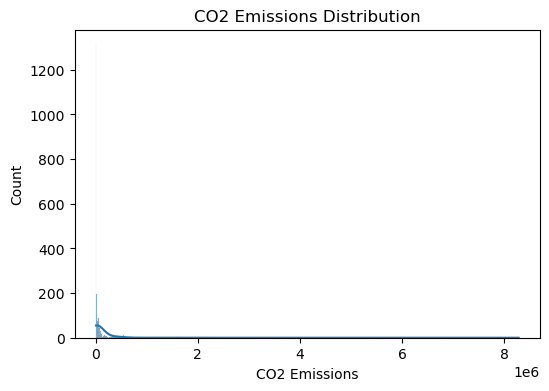

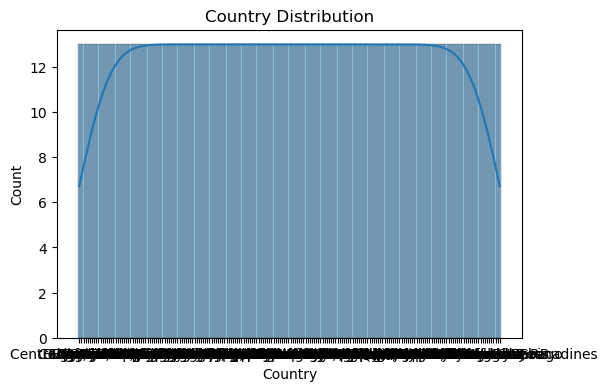

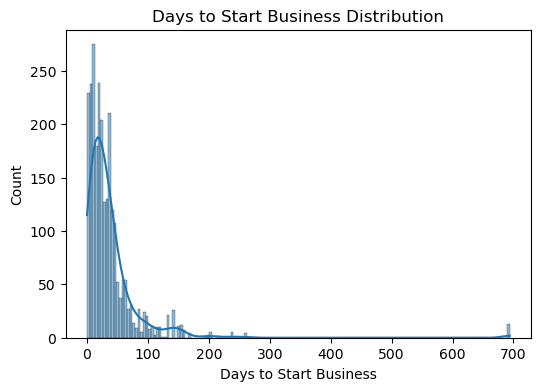

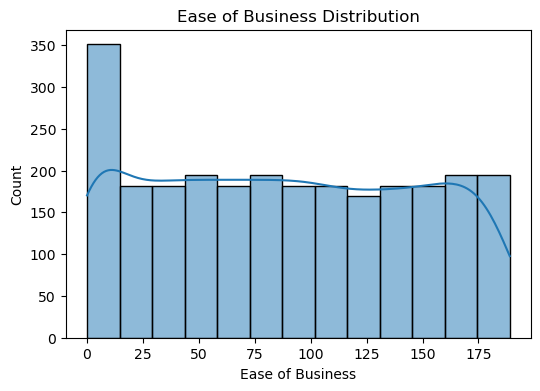

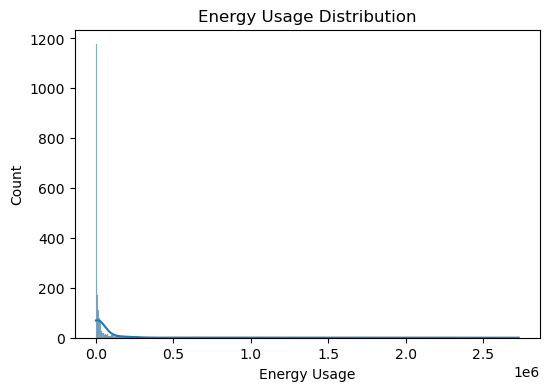

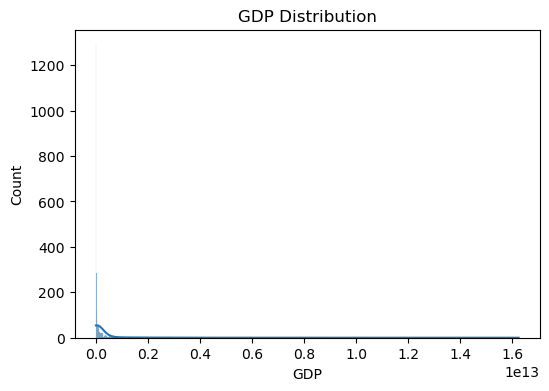

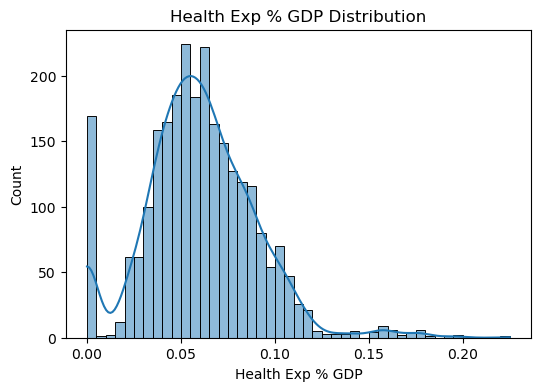

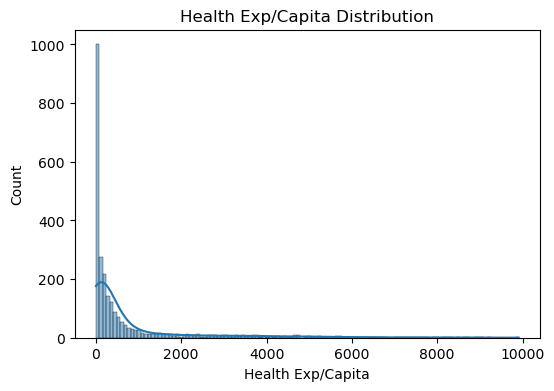

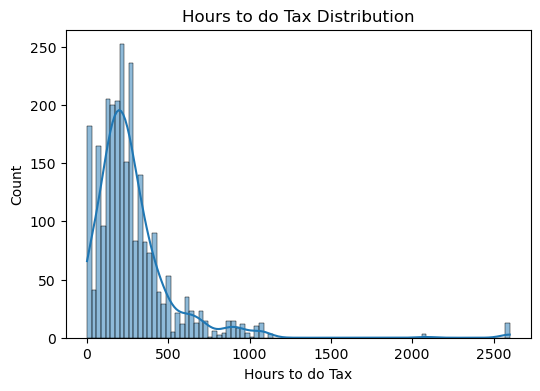

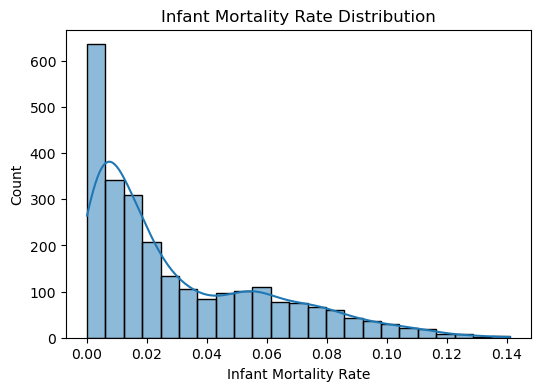

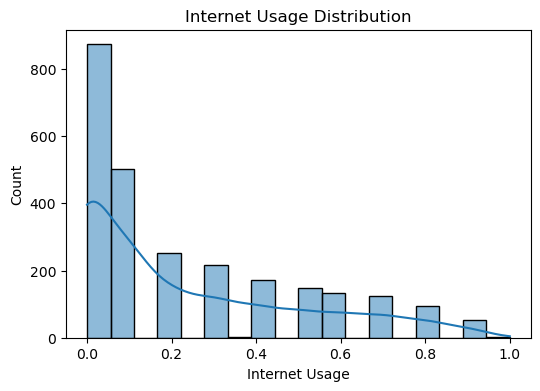

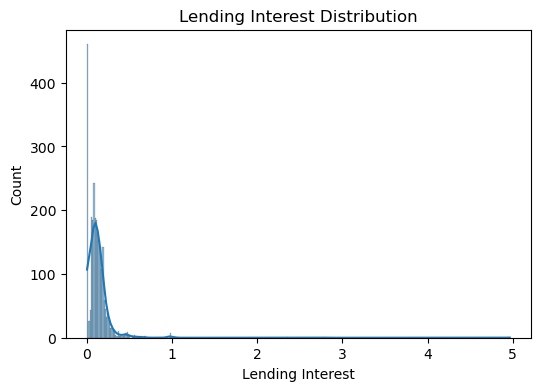

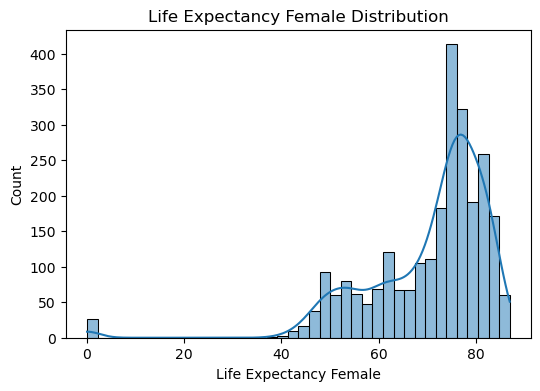

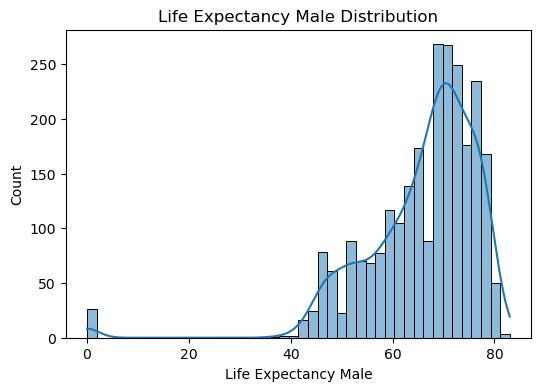

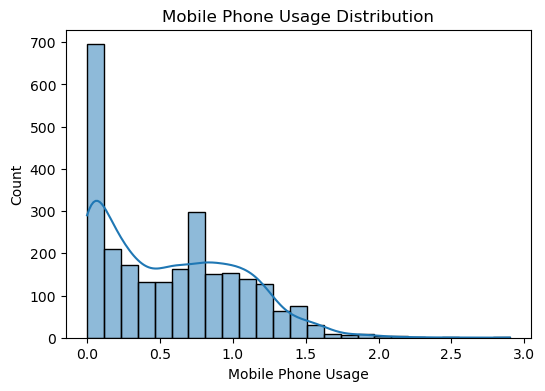

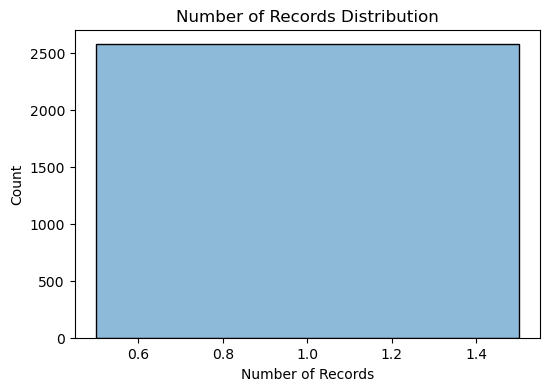

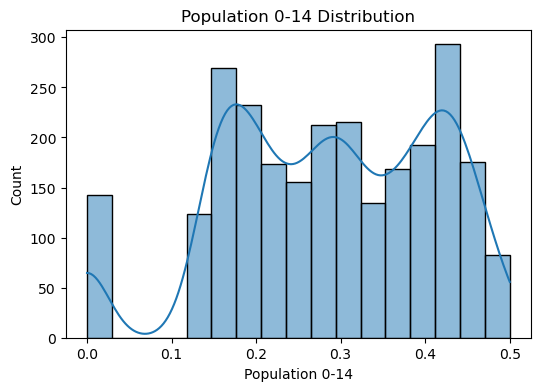

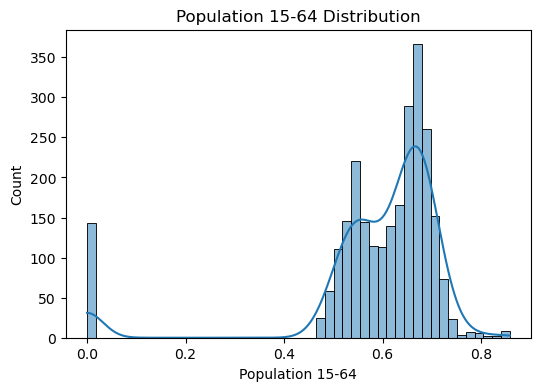

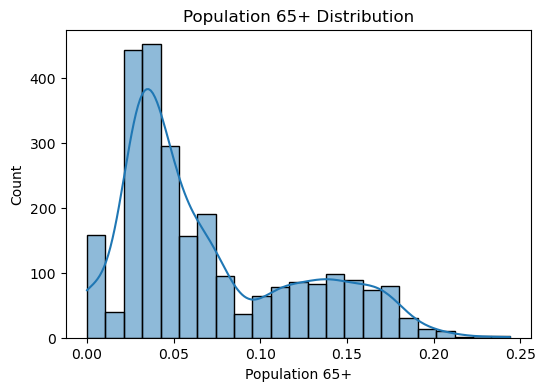

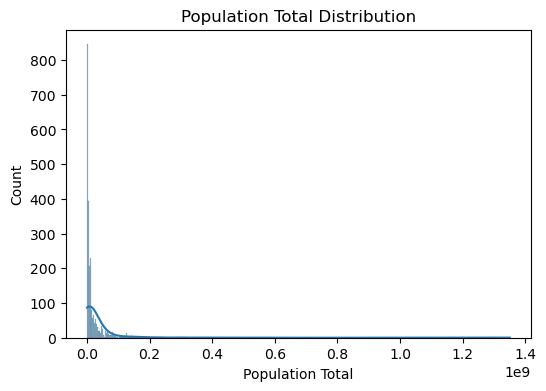

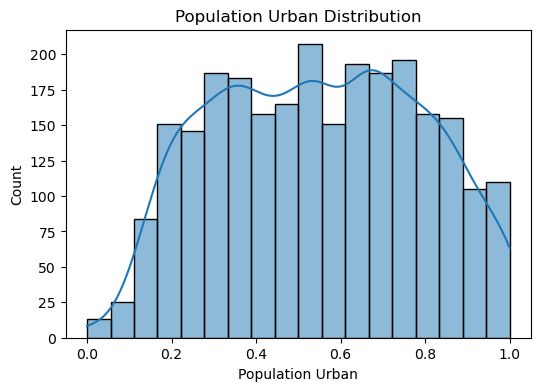

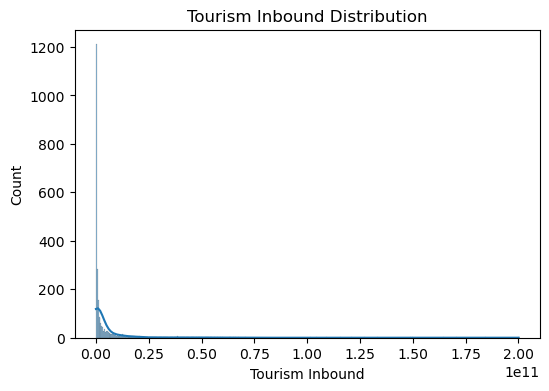

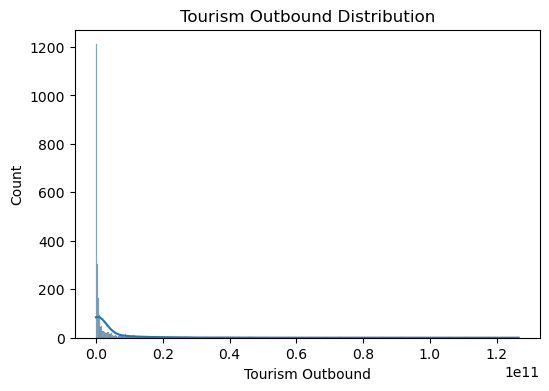

In [14]:
for feature in features:
    plt.figure(figsize=(6,4))    
    sb.histplot(df[feature], kde=True)
    title = feature + " Distribution"
    plt.title(title)
    plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Country'] = le.fit_transform(df['Country'])

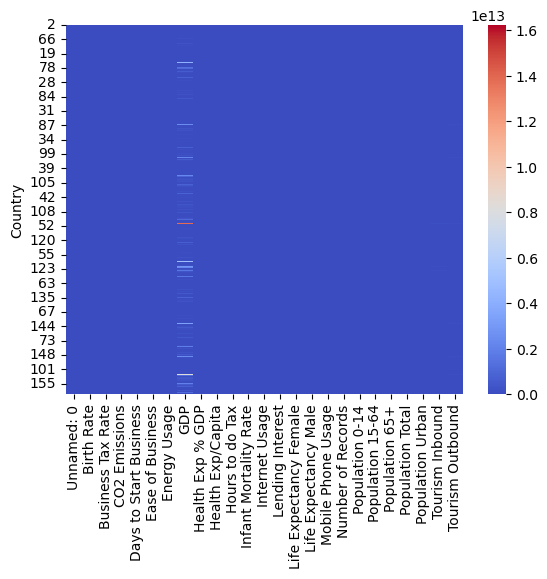

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.set_index("Country"), cmap="coolwarm")
plt.show()

#### create new csv file and export all cleaned data

In [17]:
df.to_csv('complete_World_development_mesurement.csv')

The complete_World_development_mesurement.csv file contains complete data, which means data without nulls and outliers and it is ready for scaling and modeling